Aim: Understand and analyse the concept of Regression algorithm techniques.
Program: Implement the non-parametric Locally Weighted Regression algorithm in orde to fit data points. Select appropriate data set for your experiment and draw graphs.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def locally_weighted_regression(x, X, y, tau):
    """
    Locally Weighted Regression function.
    
    Parameters:
    x: numpy array, the point at which prediction is to be made
    X: numpy array, feature values of the dataset
    y: numpy array, target values of the dataset
    tau: float, bandwidth parameter
    
    Returns:
    float, predicted value at point x
    """
    m = X.shape[0]  # Number of training examples
    W = np.zeros((m, m))
    
    for i in range(m):
        W[i, i] = np.exp(- (np.linalg.norm(x - X[i])**2) / (2 * tau * tau))
    
    theta = np.linalg.inv(X.T @ W @ X) @ X.T @ W @ y
    return np.dot(np.append(1, x), theta)

In [3]:
# Generate synthetic dataset
np.random.seed(42)
X = np.linspace(0, 10, 100)
y = np.sin(X) + np.random.normal(0, 0.1, 100)

In [5]:
X.shape, y.shape

((100,), (100,))

In [6]:
# Apply Locally Weighted Regression
tau = 0.5
predictions = []

for x in X:
    x_vec = np.array([x])
    prediction = locally_weighted_regression(x_vec, np.c_[np.ones(len(X)), X], y, tau)
    predictions.append(prediction)

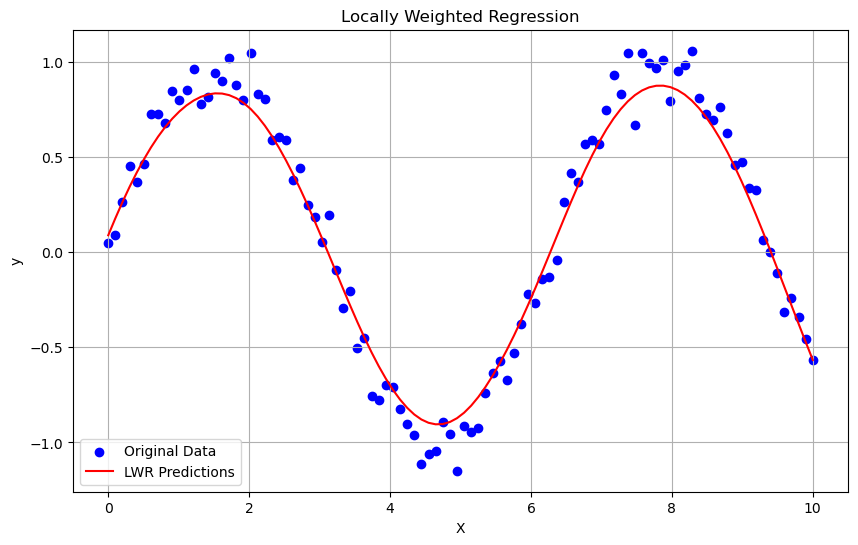

In [7]:
# Plot original data and LWR predictions
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Original Data', color='blue')
plt.plot(X, predictions, label='LWR Predictions', color='red')
plt.title('Locally Weighted Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()